# Logistic Regression using Python

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import re
%matplotlib inline

In [2]:
filepath = os.path.join("..","Course Work")

In [3]:
#read the marketing campaing csv file in to a dataframe
reg_Mark = pd.read_csv(os.path.join(filepath,"ModifiedMarketingClean.csv"))

In [4]:
reg_Mark.head()

,CUST_ID,CUST_GENDER,AGE,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,102561,0,49,18,2,0,Other,4,0,0,0,1,0,1,0,0
1,102826,0,33,18,3,0,Crafts,4,0,1,1,0,0,1,0,0
2,101980,0,62,18,2,0,Prof,4,0,0,0,1,0,1,0,0
3,102825,1,63,18,3,0,Machine,2,0,1,1,1,0,1,0,0
4,101536,1,59,18,2,0,Crafts,3,1,0,0,1,0,1,0,0


In [5]:
feature_cols = ['CUST_GENDER', 'AGE', 'COUNTRY_NAME', 'CUST_INCOME_LEVEL', 'EDUCATION', 'HOUSEHOLD_SIZE',
               'BULK_PACK_DISKETTES', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION', 
               'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI']

In [6]:
X = reg_Mark[feature_cols] #featured columns
y = reg_Mark['AFFINITY_CARD'] #Target Variable

Split data into Train and Test models

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) # 60% training and 40% test

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using `LogisticRegression()` function.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [12]:
#import the class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

#predict
y_pred = logreg.predict(X_test)

print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 76.0


# Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[434,  17],
       [127,  22]])

# Visualizing Confusion Matrix using Heatmap¶

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5,257.44,'Predicted label')

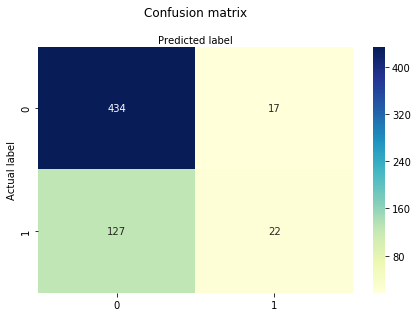

In [10]:
class_names = [0,1] # name of the target variable 'label' class
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix Evaluation Metrics

In [11]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.76
Precision: 0.5641025641025641
Recall: 0.1476510067114094


A classification rate of `76.0%` shows that the model is considered to be likely `Accurate`

`Precision:` Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In this prediction case, when your Logistic Regression model predicted that under the circumstances  is at `56.4%` meaning the model is not very precise in determining an pattern or trend within the data. It determines that the precision is almost half and half with respect to how to predict the model.

`Recall:` Recall value determines the likelihood of `AFFINITY_CARD` can be accurately predicted within the Test data and the result also shows a low rate of 14% which tell us that the model cannot be very accurate in predicting patterns of trends within the dataset.

# ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [13]:
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 

Defining a python function to plot the ROC curves.

In [14]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Fit a model on the train data

In [15]:
model = RandomForestClassifier()  
model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Predict probabilities for the test data.

In [16]:
probs = model.predict_proba(X_test)

Keep Probabilities of the positive class only

In [17]:
probs = probs[:, 1]

Compute the AUC Score.

In [18]:
auc = roc_auc_score(y_test, probs)  
print('AUC: %.2f' % auc)  

AUC: 0.79


Get the ROC Curve. Plot ROC Curve using our defined function

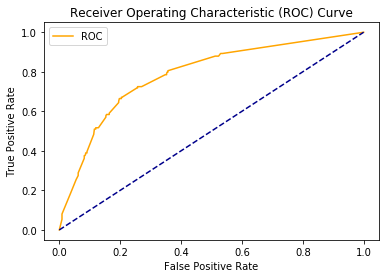

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr) #plot ROC Curve

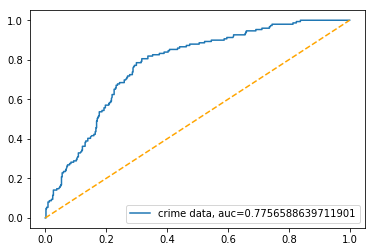

In [20]:
# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,label="crime data, auc="+str(roc_auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.legend(loc=4)
plt.show()